In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Standard Stats

In [2]:
# scrape data
url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"
df1 = pd.read_html(url)[0]

In [3]:
# create data frame and drop multi-level header
standard = pd.DataFrame(df1)
standard.columns = standard.columns.droplevel(0)

In [4]:
# filter out less than 1000 and na splitter rows
standard = standard[standard['Player'] != 'Player']
standard['Min'] = standard['Min'].astype(int)
standard = standard[standard['Min']>=1000]

In [5]:
# select certain columns
standard_df = standard[['Player', 'Nation', 'Pos', 'Squad', 'Min', '90s', 'Gls', 'Ast', 'PrgP', 'PrgC', 'PrgR']]
standard_df.head()

,Player,Nation,Pos,Squad,Min,90s,Gls,Gls,Ast,Ast,PrgP,PrgC,PrgR
0,Max Aarons,eng ENG,DF,Bournemouth,1237,13.7,0,0.00,1,0.07,43,22,26
1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,1267,14.1,2,0.14,2,0.14,56,37,91
4,Yunis Abdelhamid,ma MAR,DF,Reims,2781,30.9,4,0.13,0,0.00,137,36,9
5,Salis Abdul Samed,gh GHA,MF,Lens,1519,16.9,0,0.00,0,0.00,78,9,20
7,Laurent Abergel,fr FRA,MF,Lorient,2860,31.8,2,0.06,1,0.03,194,38,51


#### Scoring Chances

In [6]:
# scrape data
url = "https://fbref.com/en/comps/Big5/2023-2024/gca/players/2023-2024-Big-5-European-Leagues-Stats"
df1x = pd.read_html(url)[0]

In [7]:
# create data frame and drop multi-level header
gca = pd.DataFrame(df1x)
gca.columns = gca.columns.droplevel(0)

In [8]:
# filter out na splitter rows
gca = gca[gca['Player'] != 'Player']

In [9]:
# select certain columns
gca_df = gca[['Player', 'Squad', 'SCA90', 'GCA90']]
gca_df.head()

,Player,Squad,SCA90,GCA90
0,Max Aarons,Bournemouth,1.68,0.15
1,Brenden Aaronson,Union Berlin,3.76,0.57
2,Paxten Aaronson,Eint Frankfurt,0.89,0.89
3,Keyliane Abdallah,Marseille,0.00,0.00
4,Yunis Abdelhamid,Reims,0.78,0.03


##### Defensive Actions

In [10]:
# scrape data
url = "https://fbref.com/en/comps/Big5/2023-2024/defense/players/2023-2024-Big-5-European-Leagues-Stats"
df2x = pd.read_html(url)[0]

In [11]:
# create data frame and drop multi-level header
defensive = pd.DataFrame(df2x)
defensive.columns = defensive.columns.droplevel(0)

In [12]:
# filter out na splitter rows
defensive = defensive[defensive['Player'] != 'Player']

In [13]:
# select certain columns
defensive_df = defensive[['Player', 'Squad', 'Tkl+Int', 'Blocks']]
defensive_df.head()

,Player,Squad,Tkl+Int,Blocks
0,Max Aarons,Bournemouth,37,9
1,Brenden Aaronson,Union Berlin,34,26
2,Paxten Aaronson,Eint Frankfurt,2,2
3,Keyliane Abdallah,Marseille,0,0
4,Yunis Abdelhamid,Reims,103,51


##### Passing

In [14]:
# scrape data
url = "https://fbref.com/en/comps/Big5/2023-2024/passing/players/2023-2024-Big-5-European-Leagues-Stats"
df3x = pd.read_html(url)[0]

In [15]:
# create data frame and drop multi-level header
passing = pd.DataFrame(df3x)
passing.columns = passing.columns.droplevel(0)

In [16]:
# filter out na splitter rows
passing = passing[passing['Player'] != 'Player']

In [17]:
# select certain columns
passing_df = passing[['Player', 'Squad', 'Cmp', 'Cmp%', 'CrsPA', 'PPA']]
passing_df.head()

,Player,Squad,Cmp,Cmp,Cmp,Cmp,Cmp%,Cmp%,Cmp%,Cmp%,CrsPA,PPA
0,Max Aarons,Bournemouth,450,220,188,34,77.5,88.7,80.0,54.0,2,13
1,Brenden Aaronson,Union Berlin,365,206,105,19,77.3,85.8,80.8,59.4,3,14
2,Paxten Aaronson,Eint Frankfurt,41,20,20,0,82.0,80.0,90.9,0.0,0,2
3,Keyliane Abdallah,Marseille,1,1,0,0,100.0,100.0,NaN,NaN,0,0
4,Yunis Abdelhamid,Reims,1552,487,893,141,84.5,88.9,91.5,56.0,0,3


##### Merge Data Together

In [49]:
# merge data together
player_df = standard_df.merge(gca_df, on=['Player', 'Squad'], how='left')
player_df = player_df.merge(defensive_df, on=['Player', 'Squad'], how='left')
player_df = player_df.merge(passing_df, on=['Player', 'Squad'], how='left')

player_df.head()

,Player,Nation,Pos,Squad,Min,90s,Gls,Gls,Ast,Ast,...,Cmp,Cmp,Cmp,Cmp,Cmp%,Cmp%,Cmp%,Cmp%,CrsPA,PPA
0,Max Aarons,eng ENG,DF,Bournemouth,1237,13.7,0,0.00,1,0.07,...,450,220,188,34,77.5,88.7,80.0,54.0,2,13
1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,1267,14.1,2,0.14,2,0.14,...,365,206,105,19,77.3,85.8,80.8,59.4,3,14
2,Yunis Abdelhamid,ma MAR,DF,Reims,2781,30.9,4,0.13,0,0.00,...,1552,487,893,141,84.5,88.9,91.5,56.0,0,3
3,Salis Abdul Samed,gh GHA,MF,Lens,1519,16.9,0,0.00,0,0.00,...,796,393,330,41,88.9,90.8,91.7,75.9,2,5
4,Laurent Abergel,fr FRA,MF,Lorient,2860,31.8,2,0.06,1,0.03,...,1551,629,711,150,84.5,89.0,88.7,64.4,3,23


In [56]:
# filter out GK
players = player_df[player_df['Pos'] != 'GK']
players.shape

(1415, 27)

In [57]:
players.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Min', '90s', 'Gls', 'gls90', 'Ast',
       'ast90', 'PrgP', 'PrgC', 'PrgR', 'SCA90', 'GCA90', 'Tkl+Int', 'Blocks',
       'passes', 'Cmp', 'Cmp', 'Cmp', 'pass%', 'Cmp%', 'Cmp%', 'Cmp%', 'CrsPA',
       'PPA'],
      dtype='object')

In [58]:
# rename some similar columns
players.columns.values[7] = 'gls90'
players.columns.values[9] = 'ast90'
players.columns.values[17] = 'passes'
players.columns.values[21] = 'pass%'

# drop the additional pass completion columns
players = players.drop(players[['Cmp', 'Cmp%']], axis=1)
players = players.drop(['Gls', 'Ast', 'Nation', 'Squad'], axis=1)

players.head()

,Player,Pos,Min,90s,gls90,ast90,PrgP,PrgC,PrgR,SCA90,GCA90,Tkl+Int,Blocks,passes,pass%,CrsPA,PPA
0,Max Aarons,DF,1237,13.7,0.00,0.07,43,22,26,1.68,0.15,37,9,450,77.5,2,13
1,Brenden Aaronson,"MF,FW",1267,14.1,0.14,0.14,56,37,91,3.76,0.57,34,26,365,77.3,3,14
2,Yunis Abdelhamid,DF,2781,30.9,0.13,0.00,137,36,9,0.78,0.03,103,51,1552,84.5,0,3
3,Salis Abdul Samed,MF,1519,16.9,0.00,0.00,78,9,20,1.60,0.18,33,12,796,88.9,2,5
4,Laurent Abergel,MF,2860,31.8,0.06,0.03,194,38,51,2.55,0.16,146,29,1551,84.5,3,23


In [59]:
# we will need to convert data types
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1526
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   1415 non-null   object
 1   Pos      1415 non-null   object
 2   Min      1415 non-null   int32 
 3   90s      1415 non-null   object
 4   gls90    1415 non-null   object
 5   ast90    1415 non-null   object
 6   PrgP     1415 non-null   object
 7   PrgC     1415 non-null   object
 8   PrgR     1415 non-null   object
 9   SCA90    1415 non-null   object
 10  GCA90    1415 non-null   object
 11  Tkl+Int  1415 non-null   object
 12  Blocks   1415 non-null   object
 13  passes   1415 non-null   object
 14  pass%    1415 non-null   object
 15  CrsPA    1415 non-null   object
 16  PPA      1415 non-null   object
dtypes: int32(1), object(16)
memory usage: 193.5+ KB


In [60]:
# convert metrics to int or float
players[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%']] = players[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%']].astype(float)
players[['PrgP', 'PrgC', 'PrgR', 'Tkl+Int', 'Blocks', 'passes', 'CrsPA', 'PPA']] = players[['PrgP', 'PrgC', 'PrgR', 'Tkl+Int', 'Blocks', 'passes', 'CrsPA', 'PPA']].astype(int)
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1526
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   1415 non-null   object 
 1   Pos      1415 non-null   object 
 2   Min      1415 non-null   int32  
 3   90s      1415 non-null   float64
 4   gls90    1415 non-null   float64
 5   ast90    1415 non-null   float64
 6   PrgP     1415 non-null   int32  
 7   PrgC     1415 non-null   int32  
 8   PrgR     1415 non-null   int32  
 9   SCA90    1415 non-null   float64
 10  GCA90    1415 non-null   float64
 11  Tkl+Int  1415 non-null   int32  
 12  Blocks   1415 non-null   int32  
 13  passes   1415 non-null   int32  
 14  pass%    1415 non-null   float64
 15  CrsPA    1415 non-null   int32  
 16  PPA      1415 non-null   int32  
dtypes: float64(6), int32(9), object(2)
memory usage: 149.2+ KB


In [61]:
# create the rest of our per90 metrics
players['prgp90'] = players['PrgP']/players['90s']
players['prgc90'] = players['PrgC']/players['90s']
players['prgr90'] = players['PrgR']/players['90s']
players['tkl+int90'] = players['Tkl+Int']/players['90s']
players['blocks90'] = players['Blocks']/players['90s']
players['passes90'] = players['passes']/players['90s']
players['crsPA90'] = players['CrsPA']/players['90s']
players['pPA90'] = players['PPA']/players['90s']


#drop all the variables we made a per 90 rate of
players = players.drop(['PrgP', 'PrgC', 'PrgR', 'Tkl+Int', 'Blocks', 'passes', 'CrsPA', 'PPA'], axis=1)

players.head()

,Player,Pos,Min,90s,gls90,ast90,SCA90,GCA90,pass%,prgp90,prgc90,prgr90,tkl+int90,blocks90,passes90,crsPA90,pPA90
0,Max Aarons,DF,1237,13.7,0.00,0.07,1.68,0.15,77.5,3.138686,1.605839,1.897810,2.700730,0.656934,32.846715,0.145985,0.948905
1,Brenden Aaronson,"MF,FW",1267,14.1,0.14,0.14,3.76,0.57,77.3,3.971631,2.624113,6.453901,2.411348,1.843972,25.886525,0.212766,0.992908
2,Yunis Abdelhamid,DF,2781,30.9,0.13,0.00,0.78,0.03,84.5,4.433657,1.165049,0.291262,3.333333,1.650485,50.226537,0.000000,0.097087
3,Salis Abdul Samed,MF,1519,16.9,0.00,0.00,1.60,0.18,88.9,4.615385,0.532544,1.183432,1.952663,0.710059,47.100592,0.118343,0.295858
4,Laurent Abergel,MF,2860,31.8,0.06,0.03,2.55,0.16,84.5,6.100629,1.194969,1.603774,4.591195,0.911950,48.773585,0.094340,0.723270


In [62]:
# now our target variable is position, some of these players have multiple listed
# we will split so if a player has two positions, we take the first listed position

players[['primary_pos', 'secondary_pos']] = players['Pos'].str.split(",", n=1, expand=True)
players = players.drop(columns=['Pos', 'secondary_pos', 'Min'])
players.head()

,Player,90s,gls90,ast90,SCA90,GCA90,pass%,prgp90,prgc90,prgr90,tkl+int90,blocks90,passes90,crsPA90,pPA90,primary_pos
0,Max Aarons,13.7,0.00,0.07,1.68,0.15,77.5,3.138686,1.605839,1.897810,2.700730,0.656934,32.846715,0.145985,0.948905,DF
1,Brenden Aaronson,14.1,0.14,0.14,3.76,0.57,77.3,3.971631,2.624113,6.453901,2.411348,1.843972,25.886525,0.212766,0.992908,MF
2,Yunis Abdelhamid,30.9,0.13,0.00,0.78,0.03,84.5,4.433657,1.165049,0.291262,3.333333,1.650485,50.226537,0.000000,0.097087,DF
3,Salis Abdul Samed,16.9,0.00,0.00,1.60,0.18,88.9,4.615385,0.532544,1.183432,1.952663,0.710059,47.100592,0.118343,0.295858,MF
4,Laurent Abergel,31.8,0.06,0.03,2.55,0.16,84.5,6.100629,1.194969,1.603774,4.591195,0.911950,48.773585,0.094340,0.723270,MF


#### Performance Evaluation

In [63]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [66]:
# create an 80-20 split of the data
np.random.seed(42)

players_train, players_test = train_test_split(
    players, train_size=0.80, stratify=players['primary_pos']
)

In [67]:
# check sizing
print(players_train.shape)
print(players_test.shape)

(1132, 16)
(283, 16)


In [68]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# create the x and y variables
X = players_train[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']]
y = players_train['primary_pos']

In [69]:
# fit the knn model
knn.fit(X, y)

KNeighborsClassifier()

In [70]:
# now create predictions
players_test['predicted'] = knn.predict(players_test[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']])
players_test[['Player', 'primary_pos', 'predicted']]

,Player,primary_pos,predicted
192,Josh Brownhill,MF,DF
231,Maxence Caqueret,MF,MF
856,Eric Martel,MF,MF
1393,Andros Townsend,MF,MF
845,Riccardo Marchizza,DF,DF
...,...,...,...
1304,Tomáš Souček,MF,MF
679,Reda Khadra,FW,FW
1015,Gerzino Nyamsi,DF,DF
576,Christophe Hérelle,DF,MF


In [71]:
# score the predictions
knn.score(
    players_test[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']],
    players_test['primary_pos']
)

0.7597173144876325

A 75.97% accuracy is not terrible, but I would like to crack 80-85%

In [72]:
# important an additional scoring option
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [73]:
# the matrix of classifications
confusion_matrix(players_test['primary_pos'], players_test['predicted'])

array([[106,   2,  15],
       [  3,  57,   6],
       [ 34,   8,  52]], dtype=int64)

In [74]:
# classification score report
print(classification_report(players_test['primary_pos'], players_test['predicted']))

              precision    recall  f1-score   support

          DF       0.74      0.86      0.80       123
          FW       0.85      0.86      0.86        66
          MF       0.71      0.55      0.62        94

    accuracy                           0.76       283
   macro avg       0.77      0.76      0.76       283
weighted avg       0.76      0.76      0.75       283



Looks like the model is a bit weaker at classifying midfielders. Likely due to the fact midfield is a diversified pool of players. Some wingers may be classified as midfields, some defenders might be classified as midfielders.  

Overall, we have a fairly decent classification of players, in particular attackers. Maybe we can optimize the number of neighbors for the classification system. 

In [108]:
# create grid of neighbours to select from
parameter_grid = {
    "n_neighbors": range(1, 50, 1)
}

In [109]:
# create the grid for the data to iterate through
pos_tune_grid = GridSearchCV(
    estimator = knn,
    param_grid=parameter_grid,
    cv=10 # we will run with 10 folds for now
)

In [110]:
# fit the model
pos_tune_grid.fit(
    players_train[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']],
    players_train['primary_pos']
)

accuracy_grid = pd.DataFrame(pos_tune_grid.cv_results_)
accuracy_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016533,0.004267,0.025771,0.005465,1,{'n_neighbors': 1},0.649123,0.736842,0.796460,0.752212,0.681416,0.778761,0.619469,0.725664,0.681416,0.716814,0.713818,0.053280,27
1,0.011842,0.000990,0.018221,0.001512,2,{'n_neighbors': 2},0.684211,0.719298,0.716814,0.734513,0.716814,0.778761,0.672566,0.752212,0.654867,0.725664,0.715572,0.035116,23
2,0.011054,0.001474,0.017862,0.001546,3,{'n_neighbors': 3},0.719298,0.710526,0.743363,0.716814,0.725664,0.752212,0.681416,0.796460,0.681416,0.743363,0.727053,0.032539,10
3,0.011129,0.001043,0.019040,0.001762,4,{'n_neighbors': 4},0.719298,0.701754,0.787611,0.743363,0.690265,0.778761,0.716814,0.805310,0.690265,0.761062,0.739450,0.039828,3
4,0.013448,0.002129,0.022125,0.003071,5,{'n_neighbors': 5},0.701754,0.736842,0.734513,0.743363,0.707965,0.707965,0.672566,0.814159,0.672566,0.778761,0.727045,0.042409,12
5,0.011056,0.000829,0.017706,0.000901,6,{'n_neighbors': 6},0.719298,0.728070,0.734513,0.752212,0.707965,0.743363,0.707965,0.769912,0.707965,0.752212,0.732347,0.020733,6
6,0.011023,0.000699,0.018695,0.001154,7,{'n_neighbors': 7},0.710526,0.728070,0.716814,0.734513,0.743363,0.752212,0.716814,0.769912,0.734513,0.814159,0.742090,0.029424,2
7,0.011137,0.000789,0.017833,0.001189,8,{'n_neighbors': 8},0.728070,0.701754,0.752212,0.734513,0.707965,0.725664,0.681416,0.787611,0.690265,0.778761,0.728823,0.033826,9
8,0.011577,0.001129,0.018416,0.001436,9,{'n_neighbors': 9},0.728070,0.701754,0.734513,0.725664,0.716814,0.725664,0.663717,0.787611,0.716814,0.769912,0.727053,0.032289,11
9,0.012076,0.001171,0.018358,0.001115,10,{'n_neighbors': 10},0.736842,0.710526,0.716814,0.716814,0.681416,0.699115,0.672566,0.814159,0.690265,0.787611,0.722613,0.043384,18


Looks like 13 is the ideal number of neighbours. Let's perform a visual inspection of the neighbours.

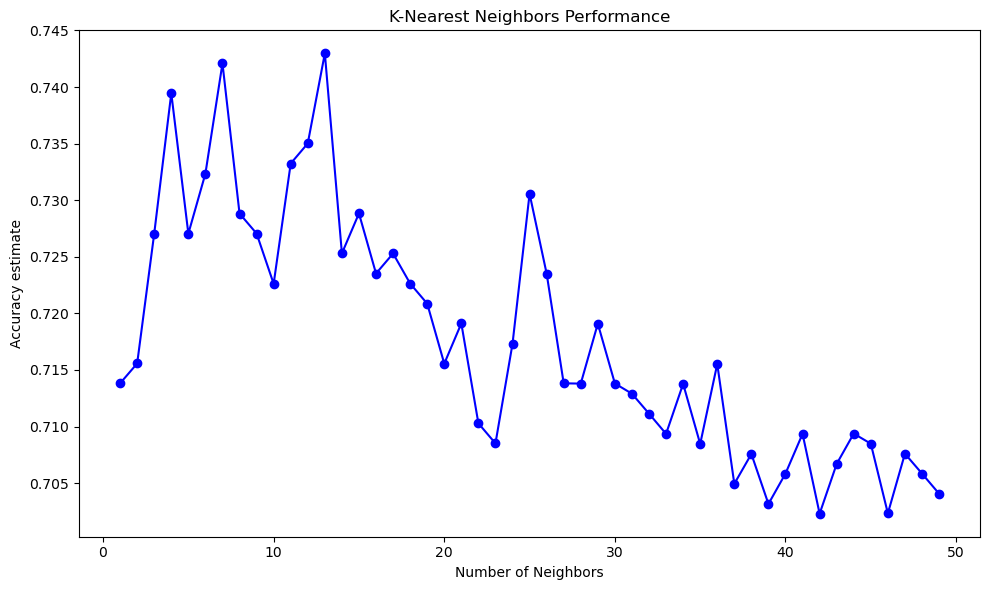

In [111]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracy_grid['param_n_neighbors'], accuracy_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

In [112]:
# extract the maximal k value
k=accuracy_grid[accuracy_grid['rank_test_score']==1]['param_n_neighbors'].values[0]
k


13

In [138]:
print(f"Let's take a look at our final metrics from k={k}")

Let's take a look at our final metrics from k=13


In [113]:
knn = KNeighborsClassifier(n_neighbors = k)
X = players_train[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']]
y = players_train['primary_pos']

knn.fit(X,y)

KNeighborsClassifier(n_neighbors=13)

In [114]:
# optimal metrics
optimal_acc = knn.score(players_test[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']],
                        players_test['primary_pos'])

print(f"The optimal accuracy of the classification model is {optimal_acc}.")

The optimal accuracy of the classification model is 0.7561837455830389.


In [116]:
# try the predicted optimal value
players_test['predicted'] = knn.predict(players_test[['90s', 'gls90', 'ast90', 'SCA90', 'GCA90', 'pass%', 'prgp90', 'prgc90', 'prgr90', 'tkl+int90', 'blocks90', 'passes90', 'crsPA90', 'pPA90']])
players_test[['Player', 'primary_pos', 'predicted']]

,Player,primary_pos,predicted
192,Josh Brownhill,MF,DF
231,Maxence Caqueret,MF,MF
856,Eric Martel,MF,MF
1393,Andros Townsend,MF,FW
845,Riccardo Marchizza,DF,DF
...,...,...,...
1304,Tomáš Souček,MF,DF
679,Reda Khadra,FW,FW
1015,Gerzino Nyamsi,DF,DF
576,Christophe Hérelle,DF,MF


Earlier, the accuracy score was 75.9%. Let's check to see if the classification report shows better results.

In [117]:
pd.crosstab(
    players_test['primary_pos'],
    players_test['predicted']
)

predicted,DF,FW,MF
primary_pos,,,
DF,109,2,12
FW,2,58,6
MF,37,10,47


In [118]:
# classification report
print(classification_report(players_test['primary_pos'], players_test['predicted']))

              precision    recall  f1-score   support

          DF       0.74      0.89      0.80       123
          FW       0.83      0.88      0.85        66
          MF       0.72      0.50      0.59        94

    accuracy                           0.76       283
   macro avg       0.76      0.75      0.75       283
weighted avg       0.75      0.76      0.74       283



In [ ]:
            precision    recall  f1-score   support

          DF       0.74      0.86      0.80       123
          FW       0.85      0.86      0.86        66
          MF       0.71      0.55      0.62        94

    accuracy                           0.76       283
   macro avg       0.77      0.76      0.76       283
weighted avg       0.76      0.76      0.75       283

It seems the tuning did not improve the parameter at all. Maybe our guess of 5 was particularly the best estimate for nearest neighbours.

In [119]:
players_test.head()

,Player,90s,gls90,ast90,SCA90,GCA90,pass%,prgp90,prgc90,prgr90,tkl+int90,blocks90,passes90,crsPA90,pPA90,primary_pos,predicted
192,Josh Brownhill,25.0,0.16,0.08,2.80,0.24,76.9,3.600000,0.760000,1.440000,3.800000,1.320000,34.000000,0.000000,0.640000,MF,DF
231,Maxence Caqueret,33.6,0.03,0.09,3.37,0.21,82.7,8.511905,2.083333,2.857143,4.136905,1.190476,49.434524,0.208333,1.845238,MF,MF
856,Eric Martel,27.3,0.04,0.04,1.58,0.11,81.1,2.747253,0.769231,1.282051,4.139194,2.380952,33.443223,0.109890,0.219780,MF,MF
1393,Andros Townsend,13.4,0.07,0.22,2.68,0.45,70.4,2.611940,3.507463,5.298507,1.940299,0.895522,22.686567,0.895522,1.194030,MF,FW
845,Riccardo Marchizza,12.8,0.00,0.31,1.10,0.31,75.8,2.812500,0.468750,3.046875,1.093750,0.781250,33.046875,0.390625,0.546875,DF,DF


In [133]:
# pre-process for a plot
plot_data = players_test[['primary_pos', 'predicted']]
plot_data['mismatch'] = np.where(plot_data['primary_pos'] == plot_data['predicted'], 0, 1)


plot_data = plot_data.value_counts(['primary_pos', 'mismatch']).reset_index()
plot_data.head()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_41764\3610465603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['mismatch'] = np.where(plot_data['primary_pos'] == plot_data['predicted'], 0, 1)


,primary_pos,mismatch,count
0,DF,0,109
1,FW,0,58
2,MF,0,47
3,MF,1,47
4,DF,1,14


<Figure size 1000x600 with 0 Axes>

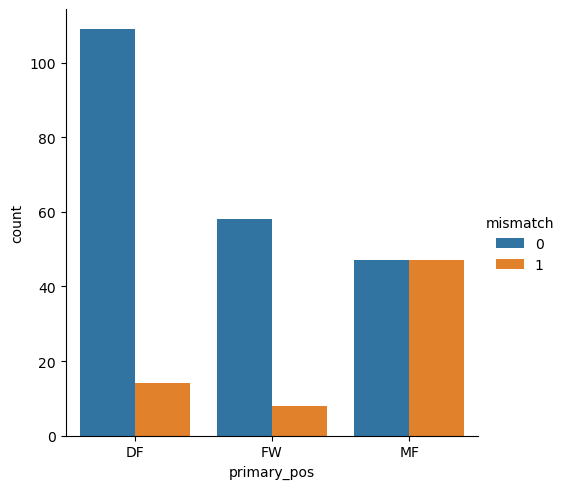

In [137]:
# create plot
plt.figure(figsize=(10,6))

# plot side by side
sns.catplot(
    data=plot_data,
    kind='bar',
    x='primary_pos',
    y='count',
    hue='mismatch'
)
plt.show()